In [25]:
import pandas as pd
import numpy as np


In [26]:
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel(r"C:\Users\moham\Documents\Portfolio Projects\Python Projects\Solar Data Analysis/Junior Data Analyst _ Data.xlsx", skiprows=2)

df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [28]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


## DATA MANIPULATION 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


## Converting date to yyyy-mm-dd and spliting the time from date 

In [32]:
# Converting Date to yyyy-mm-dd

df['Date/hour start'] = df['Date/hour start'].astype(str)

In [33]:
df[['Date', 'hour']] = df['Date/hour start'].str.split(' ', expand=True)

df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Date,hour
0,0,2020-01-01 00:00:00,0.000,1.509849,2020-01-01,00:00:00
1,1,2020-01-01 01:00:00,0.000,1.411859,2020-01-01,01:00:00
2,2,2020-01-01 02:00:00,0.000,1.023898,2020-01-01,02:00:00
3,3,2020-01-01 03:00:00,0.000,0.642000,2020-01-01,03:00:00
4,4,2020-01-01 04:00:00,0.000,0.960000,2020-01-01,04:00:00
...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020-12-31,19:00:00
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020-12-31,20:00:00
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020-12-31,21:00:00
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020-12-31,22:00:00


In [34]:
df.drop(columns = ['Date/hour start', 'hour'], inplace=True)
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,2020-01-01
1,1,0.000,1.411859,2020-01-01
2,2,0.000,1.023898,2020-01-01
3,3,0.000,0.642000,2020-01-01
4,4,0.000,0.960000,2020-01-01
...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31
8756,20,0.003,4.560600,2020-12-31
8757,21,0.000,2.022000,2020-12-31
8758,22,0.015,1.668000,2020-12-31


## Checking for Duplicates and Null values


In [36]:
df.duplicated().sum()
df.isna().sum()

Hour                                  0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
Date                                  0
dtype: int64

## Checking if the Data makes sense


In [38]:
# Checking if the Data in the hour column falls in the O to 23 range
df[(df['Hour'] < 0) | (df['Hour'] > 23)]

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date


In [39]:
# Checking if we have negative values in Electricity usage and Solar electricity generation columns

df[(df['Solar electricity generation (kWh)'] < 0) | (df['Electricity usage (kWh)'] < 0)]

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
17,17,0.006,-12.6240,2020-01-01
933,21,0.006,-2.1330,2020-02-08
935,23,0.000,-0.2175,2020-02-08
3593,17,1.185,-2.5140,2020-05-30
6464,8,0.717,-1.9770,2020-09-27


In [40]:
# Drop rows that have the erronous data in solar and electricity usage columns
index_list = df[(df['Solar electricity generation (kWh)'] < 0) | (df['Electricity usage (kWh)'] < 0)].index
df.drop(index = index_list, inplace=True)

## Checking for Outliers in our Data

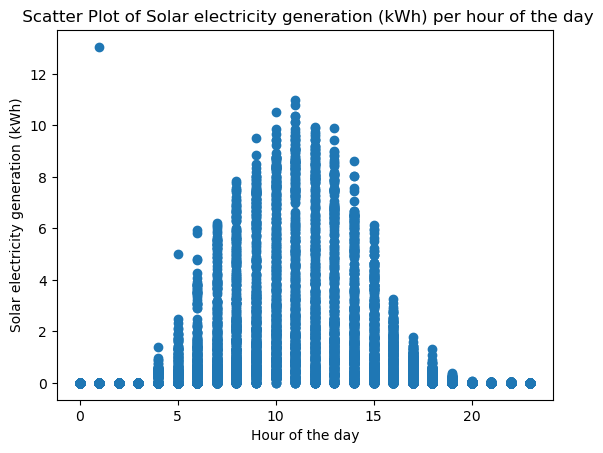

In [42]:
# Using Scatterplot to check for outliers in solar 

plt.scatter(df['Hour'], df['Solar electricity generation (kWh)'])
plt.title(' Scatter Plot of Solar electricity generation (kWh) per hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Solar electricity generation (kWh)')
plt.show()



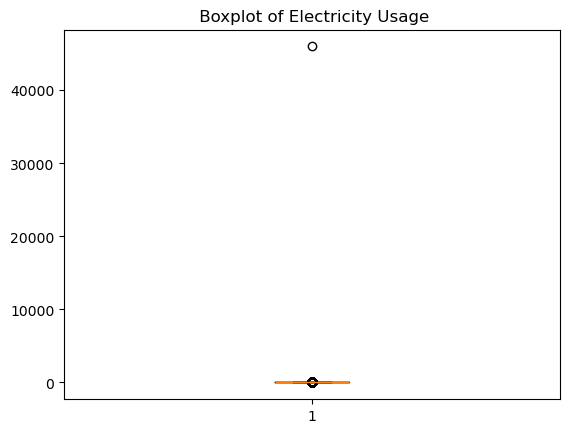

In [43]:
# Using boxplot to check for outliers in Electricity Usage

plt.boxplot(df['Electricity usage (kWh)'])
plt.title(' Boxplot of Electricity Usage')
plt.show()


In [44]:
# Checking the outliers
df[(df['Solar electricity generation (kWh)'] > 12 ) | (df['Electricity usage (kWh)'] > 40000)]

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
276,12,5.214,46000.000000,2020-01-12
2569,1,13.050,0.315968,2020-04-18


In [45]:
#Dropping them using their index

index_lst = df[(df['Solar electricity generation (kWh)'] > 12 ) | (df['Electricity usage (kWh)'] > 40000)].index

df.drop(index = index_lst, inplace=True)

In [46]:
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,2020-01-01
1,1,0.000,1.411859,2020-01-01
2,2,0.000,1.023898,2020-01-01
3,3,0.000,0.642000,2020-01-01
4,4,0.000,0.960000,2020-01-01
...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31
8756,20,0.003,4.560600,2020-12-31
8757,21,0.000,2.022000,2020-12-31
8758,22,0.015,1.668000,2020-12-31


In [47]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8753.000000,8753.000000,8753.000000
mean,11.497886,1.115337,2.065399
std,6.922001,2.022306,4.639708
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.300000
50%,11.000000,0.024000,0.621000
75%,17.000000,1.272000,1.686000
max,23.000000,10.998000,61.102800


## DATA ANALYSIS

## Step (i): Data Visualization of Average Solar Generation and Electricity Usage for each hour of the day

In [50]:
#Getting the average for Solar generated and Electricity Usage
avg_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
avg_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()

avg_solar

Hour
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.078559
5     0.270625
6     0.722868
7     1.394885
8     2.210135
9     2.941512
10    3.504041
11    3.751915
12    3.491159
13    3.012649
14    2.380767
15    1.609068
16    0.790964
17    0.365388
18    0.160652
19    0.047186
20    0.012912
21    0.008942
22    0.010126
23    0.000000
Name: Solar electricity generation (kWh), dtype: float64

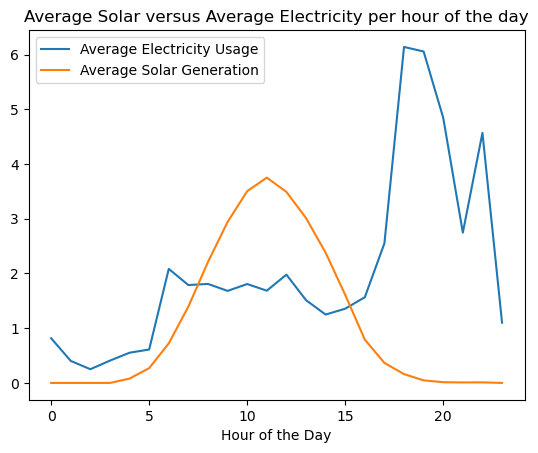

In [51]:
plt.plot(avg_electricity,label='Average Electricity Usage')
plt.plot(avg_solar, label='Average Solar Generation')
plt.title('Average Solar versus Average Electricity per hour of the day')
plt.xlabel('Hour of the Day')
plt.legend()
plt.show()

## Step (ii): Calculating Electricity Bought

In [53]:
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,2020-01-01
1,1,0.000,1.411859,2020-01-01
2,2,0.000,1.023898,2020-01-01
3,3,0.000,0.642000,2020-01-01
4,4,0.000,0.960000,2020-01-01
...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31
8756,20,0.003,4.560600,2020-12-31
8757,21,0.000,2.022000,2020-12-31
8758,22,0.015,1.668000,2020-12-31


In [54]:
# Calculating Electricity bought and limiting the results to the positive range

electricity_bought = np.maximum(df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)'],0)
df['Electricity bought'] = electricity_bought
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Electricity bought
0,0,0.000,1.509849,2020-01-01,1.509849
1,1,0.000,1.411859,2020-01-01,1.411859
2,2,0.000,1.023898,2020-01-01,1.023898
3,3,0.000,0.642000,2020-01-01,0.642000
4,4,0.000,0.960000,2020-01-01,0.960000
...,...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31,4.383600
8756,20,0.003,4.560600,2020-12-31,4.557600
8757,21,0.000,2.022000,2020-12-31,2.022000
8758,22,0.015,1.668000,2020-12-31,1.653000


## Step (iii): Calculating Excess Solar Generation

In [56]:
# Calculating solar generation and limiting the results to positives

solar_generation = np.maximum(df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)'], 0)
df['Excess solar generated'] = solar_generation
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Electricity bought,Excess solar generated
0,0,0.000,1.509849,2020-01-01,1.509849,0.0
1,1,0.000,1.411859,2020-01-01,1.411859,0.0
2,2,0.000,1.023898,2020-01-01,1.023898,0.0
3,3,0.000,0.642000,2020-01-01,0.642000,0.0
4,4,0.000,0.960000,2020-01-01,0.960000,0.0
...,...,...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31,4.383600,0.0
8756,20,0.003,4.560600,2020-12-31,4.557600,0.0
8757,21,0.000,2.022000,2020-12-31,2.022000,0.0
8758,22,0.015,1.668000,2020-12-31,1.653000,0.0


In [57]:
# Rearrange the columns for easier reading

df = df[['Hour', 'Date', 'Solar electricity generation (kWh)', 'Electricity usage (kWh)', 'Electricity bought', 'Excess solar generated']]

df


,Hour,Date,Solar electricity generation (kWh),Electricity usage (kWh),Electricity bought,Excess solar generated
0,0,2020-01-01,0.000,1.509849,1.509849,0.0
1,1,2020-01-01,0.000,1.411859,1.411859,0.0
2,2,2020-01-01,0.000,1.023898,1.023898,0.0
3,3,2020-01-01,0.000,0.642000,0.642000,0.0
4,4,2020-01-01,0.000,0.960000,0.960000,0.0
...,...,...,...,...,...,...
8755,19,2020-12-31,0.012,4.395600,4.383600,0.0
8756,20,2020-12-31,0.003,4.560600,4.557600,0.0
8757,21,2020-12-31,0.000,2.022000,2.022000,0.0
8758,22,2020-12-31,0.015,1.668000,1.653000,0.0


## Step (iv): Modeling Battery Charge Level and Calculating Electricity Bought when a battery installed

In [60]:


#Modeling Battery Charge Level
def battery_model (excess_solar, electrcity_bought):
    battery_level = 0
    battery_levels = []
    max_capacity = 12.5
    electrcity_bought_with_battery = []  
   
    #loops through excess solar and electrcity_bought columns and sets the battery level for each
    for solar, elec in zip(excess_solar, electrcity_bought):
        
        # if we have excess solar generated charge the battery instead of it going to waste
        if solar > 0:
            electricity_bought_with_battery = 0
            if battery_level < max_capacity:
                battery_level+=solar
                if battery_level >= max_capacity:
                    battery_level = max_capacity
        # when there is a deficit in solar generation and electricity usage we use battery level to compensate 
        else:
            battery_level -=elec
            if battery_level<=0:
                battery_level = 0
                electricity_bought_with_battery = elec
        
       
       
        #append the battery level to the battery_levels list and electcricity bought with battery
        battery_levels.append(battery_level)
        electrcity_bought_with_battery.append(electricity_bought_with_battery)
   

       
    return battery_levels, electrcity_bought_with_battery
df['Battery level'], df['Electrcity bought with battery'] = battery_model(df['Excess solar generated'], df['Electricity bought'])


C:\Users\moham\AppData\Local\Temp\ipykernel_12044\2785899867.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery level'], df['Electrcity bought with battery'] = battery_model(df['Excess solar generated'], df['Electricity bought'])
C:\Users\moham\AppData\Local\Temp\ipykernel_12044\2785899867.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery level'], df['Electrcity bought with battery'] = battery_model(df['Excess solar generated'], df['Electricity bought'])


In [61]:
df

,Hour,Date,Solar electricity generation (kWh),Electricity usage (kWh),Electricity bought,Excess solar generated,Battery level,Electrcity bought with battery
0,0,2020-01-01,0.000,1.509849,1.509849,0.0,0.0,1.509849
1,1,2020-01-01,0.000,1.411859,1.411859,0.0,0.0,1.411859
2,2,2020-01-01,0.000,1.023898,1.023898,0.0,0.0,1.023898
3,3,2020-01-01,0.000,0.642000,0.642000,0.0,0.0,0.642000
4,4,2020-01-01,0.000,0.960000,0.960000,0.0,0.0,0.960000
...,...,...,...,...,...,...,...,...
8755,19,2020-12-31,0.012,4.395600,4.383600,0.0,0.0,4.383600
8756,20,2020-12-31,0.003,4.560600,4.557600,0.0,0.0,4.557600
8757,21,2020-12-31,0.000,2.022000,2.022000,0.0,0.0,2.022000
8758,22,2020-12-31,0.015,1.668000,1.653000,0.0,0.0,1.653000


## Step (v): Calculating Savings from Installing a Battery


In [63]:
df['Saved'] = (df['Electricity bought'] - df['Electrcity bought with battery'])* 0.17

amount_saved = df['Saved'].sum()

print(amount_saved)

352.546793288


C:\Users\moham\AppData\Local\Temp\ipykernel_12044\2858977283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Saved'] = (df['Electricity bought'] - df['Electrcity bought with battery'])* 0.17


## Step (vi): Data Aggregation and Visualization for each month

In [65]:
# extracting month from our date 

df['Date']=pd.to_datetime(df['Date'])

df['Month name'] = df['Date'].dt.month_name()


# aggregating the data monthly

aggregated_df = df.groupby('Month name')[['Solar electricity generation (kWh)','Electricity usage (kWh)','Electricity bought','Electrcity bought with battery']].sum()

#Reordering the Month as they appear in the calender

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


aggregated_df.index = pd.Categorical(aggregated_df.index, categories=month_order, ordered=True)


aggregated_df = aggregated_df.sort_index()

aggregated_df



C:\Users\moham\AppData\Local\Temp\ipykernel_12044\350351680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\moham\AppData\Local\Temp\ipykernel_12044\350351680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month name'] = df['Date'].dt.month_name()


,Solar electricity generation (kWh),Electricity usage (kWh),Electricity bought,Electrcity bought with battery
January,261.039,1717.804181,1599.601181,1529.767781
February,449.628,1559.929310,1392.808310,1294.030310
March,602.451,1797.859450,1619.011450,1503.108773
April,902.082,1726.040519,1460.504519,1287.239524
May,1640.175,946.317809,717.333809,446.248639
June,1408.287,1158.995538,844.784538,576.016996
July,1371.465,1196.957121,907.445121,618.832589
August,1158.639,1491.525351,1217.886351,992.178222
September,834.963,1622.691165,1398.834165,1187.440048
October,546.132,1420.745585,1260.335585,1097.176781


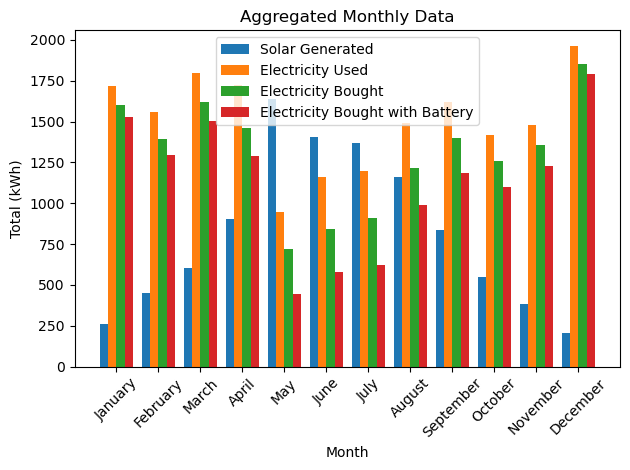

In [67]:
# Visualising the aggregated data

width = 0.2  
x = np.arange(len(aggregated_df.index))  


plt.bar(x - 1.5 * width, aggregated_df['Solar electricity generation (kWh)'], width=width, label='Solar Generated')
plt.bar(x - 0.5 * width, aggregated_df['Electricity usage (kWh)'], width=width, label='Electricity Used')
plt.bar(x + 0.5 * width, aggregated_df['Electricity bought'], width=width, label='Electricity Bought')
plt.bar(x + 1.5 * width, aggregated_df['Electrcity bought with battery'], width=width, label='Electricity Bought with Battery')


plt.xlabel('Month')
plt.ylabel('Total (kWh)')
plt.title('Aggregated Monthly Data')
plt.xticks(x, aggregated_df.index, rotation=45)  
plt.legend()
plt.tight_layout()


plt.show()


## CONCLUSION

By installing a battery in our system we look to save about 352 dollars in the whole year. With a battery costing about 4,000 dollars and the whole system costs about 6,800 dollars It does not make economic sense to install a battery at our current solar generation and electricity usage capacity.